In [67]:
import corsika
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import boost_histogram as bh
import mplhep
import particle

In [83]:
lib = corsika.Library("./shower_proton/")

In [84]:
lib.summary

{'showers': 1,
 'start time': '2023-06-12T10:11:19+0000',
 'end time': '2023-06-12T10:13:37+0000',
 'runtime': 137.821}

In [85]:
num_profile = lib.get("profile").astype("pandas")
display(num_profile)

shower       X  charged  hadron  photon  electron  positron  muplus  \
0         0     0.0      1.0     1.0     0.0       0.0       0.0     0.0   
1         0    10.0      1.0     1.0     0.0       0.0       0.0     0.0   
2         0    20.0      1.0     1.0     0.0       0.0       0.0     0.0   
3         0    30.0      1.0     1.0     0.0       0.0       0.0     0.0   
4         0    40.0      1.0     1.0     0.0       0.0       0.0     0.0   
..      ...     ...      ...     ...     ...       ...       ...     ...   
195       0  1950.0      0.0     0.0     0.0       0.0       0.0     0.0   
196       0  1960.0      0.0     0.0     0.0       0.0       0.0     0.0   
197       0  1970.0      0.0     0.0     0.0       0.0       0.0     0.0   
198       0  1980.0      0.0     0.0     0.0       0.0       0.0     0.0   
199       0  1990.0      0.0     0.0     0.0       0.0       0.0     0.0   

     muminus  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
..       ...  
195      0.0  
196      0.0  
197      0.0  
198      0.0  
199      0.0  

[200 rows x 9 columns]

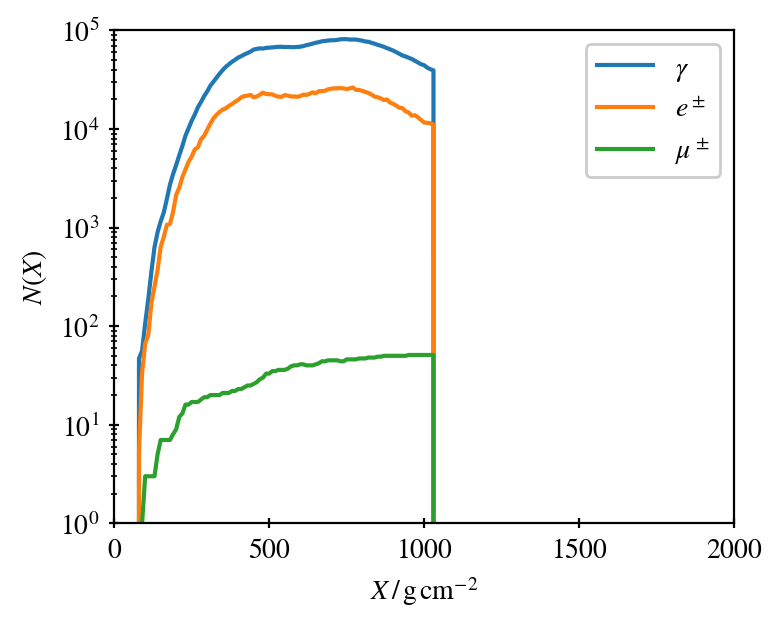

In [86]:
fig, ax = plt.subplots(dpi=200)
ax.set(xlabel=r"$X\,/\,$g$\,$cm$^{-2}$", ylabel=r"$N(X)$",
       yscale="log")
ax.plot(num_profile['X'], num_profile['photon'], label=r"$\gamma$")
ax.plot(num_profile['X'], num_profile['electron']+num_profile['positron'], label=r"$e^\pm$")
ax.plot(num_profile['X'], num_profile['muplus']+num_profile['muminus'], label=r"$\mu^\pm$")

ax.legend()

In [87]:
dEdX_profile = lib.get("energyloss").astype("pandas")
display(dEdX_profile)

shower       X     total
0         0     0.0  3.036662
1         0    10.0  3.036641
2         0    20.0  3.036641
3         0    30.0  3.036641
4         0    40.0  3.036641
..      ...     ...       ...
195       0  1950.0  0.000000
196       0  1960.0  0.000000
197       0  1970.0  0.000000
198       0  1980.0  0.000000
199       0  1990.0  0.000000

[200 rows x 3 columns]

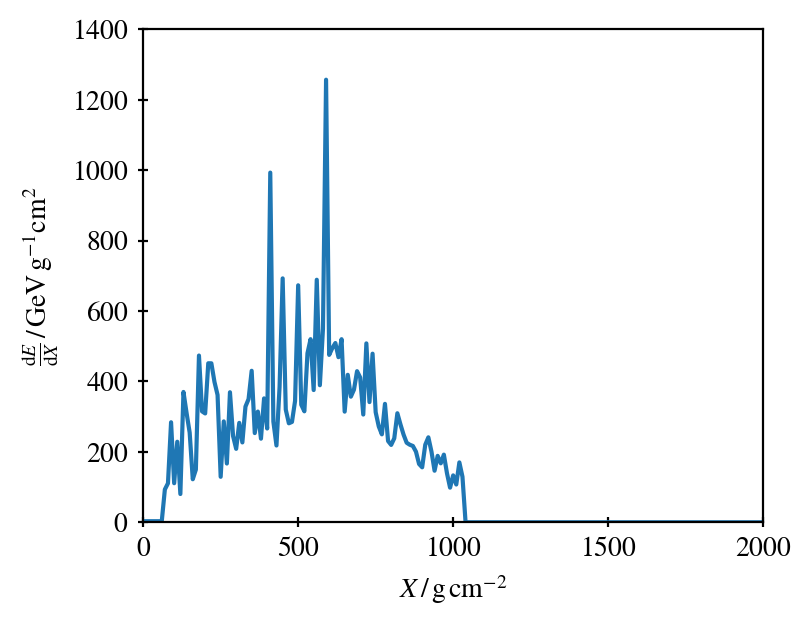

In [88]:
fig, ax = plt.subplots(dpi=200)
ax.set(xlabel=r"$X\,/\,$g$\,$cm$^{-2}$", ylabel=r"$\frac{\mathrm{d}E}{\mathrm{d}X}\,/\,$GeV$\,$g$^{-1}$cm$^2$")
ax.plot(dEdX_profile['X'], dEdX_profile['total'])

In [89]:
particles = lib.get("particles").astype("pandas")
display(particles)

shower   pdg  kinetic_energy            x           y    z      time  \
0          0    13       52.941547    36.945595 -128.800186  0.0  0.000373   
1          0   -13      249.602631   -19.190882   45.567093  0.0  0.000373   
2          0    13       69.760048    -5.660505   36.087269  0.0  0.000373   
3          0    22        0.012330   394.335693 -295.699554  0.0  0.000373   
4          0  2112        2.119189 -1218.063721 -760.489014  0.0  0.000374   
...      ...   ...             ...          ...         ...  ...       ...   
6247       0    22        0.060332   232.004440   16.392550  0.0  0.000373   
6248       0    22        0.035077     2.198892  -11.354229  0.0  0.000373   
6249       0    22        0.064947     3.821063  -27.990477  0.0  0.000373   
6250       0    22        0.036218    11.310238  -36.966122  0.0  0.000373   
6251       0    22        0.025329   -23.652231  -27.251362  0.0  0.000373   

      weight  
0        1.0  
1        1.0  
2        1.0  
3       10.0  
4        1.0  
...      ...  
6247    10.0  
6248    10.0  
6249    10.0  
6250    10.0  
6251    10.0  

[6252 rows x 8 columns]

In [93]:
hist = bh.Histogram(bh.axis.IntCategory([], growth=True), # PID
                    bh.axis.Regular(18 * 10, 1e-3, 1e15, transform=bh.axis.transform.log), # energy
                    bh.axis.Regular(20, 0, 2000), # lat. distance
                    bh.axis.Regular(360, 0, 360, circular=True) # azimuth
                   )
hist.fill(particles['pdg'],
          particles['kinetic_energy'],
          np.hypot(particles['x'], particles['y']),
          np.arctan2(particles['x'], particles['y']),
          weight=particles['weight'])

Histogram(
  IntCategory([13, -13, 22, 2112, -11, 2212, 11, -211, -2212, 211, -2112, 321, 130, -321], growth=True),
  Regular(180, 0.001, 1e+15, transform=log),
  Regular(20, 0, 2000),
  Regular(360, 0, 360, circular=True),
  storage=Double()) # Sum: 49480.47675931454 (49492.47675931454 with flow)

[Text(0, 0, '$\\mu^{-}$'),
 Text(0, 1, '$\\mu^{+}$'),
 Text(0, 2, '$\\gamma$'),
 Text(0, 3, '$n$'),
 Text(0, 4, '$e^{+}$'),
 Text(0, 5, '$p$'),
 Text(0, 6, '$e^{-}$'),
 Text(0, 7, '$\\pi^{-}$'),
 Text(0, 8, '$\\overline{p}$'),
 Text(0, 9, '$\\pi^{+}$'),
 Text(0, 10, '$\\overline{n}$'),
 Text(0, 11, '$K^{+}$'),
 Text(0, 12, '$K_{L}^{0}$'),
 Text(0, 13, '$K^{-}$')]

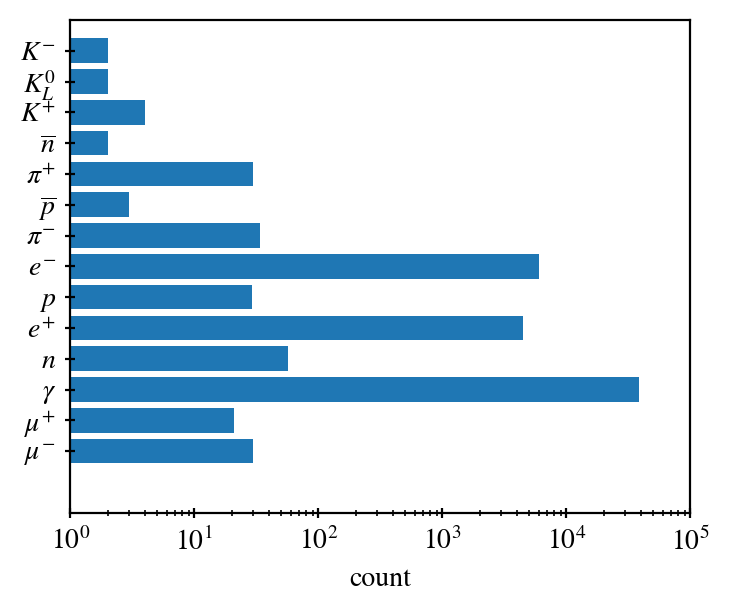

In [94]:
fig, ax = plt.subplots(dpi=200)
ax.set(xscale="log", xlabel="count")
v = hist[:, bh.sum, bh.sum, bh.sum].values()
ypos = np.arange(len(v))
ax.barh(ypos, v)
ax.set_yticks(ypos)
ax.set_yticklabels([f"${particle.Particle.from_pdgid(pid).latex_name}$" for pid in hist.axes[0]])

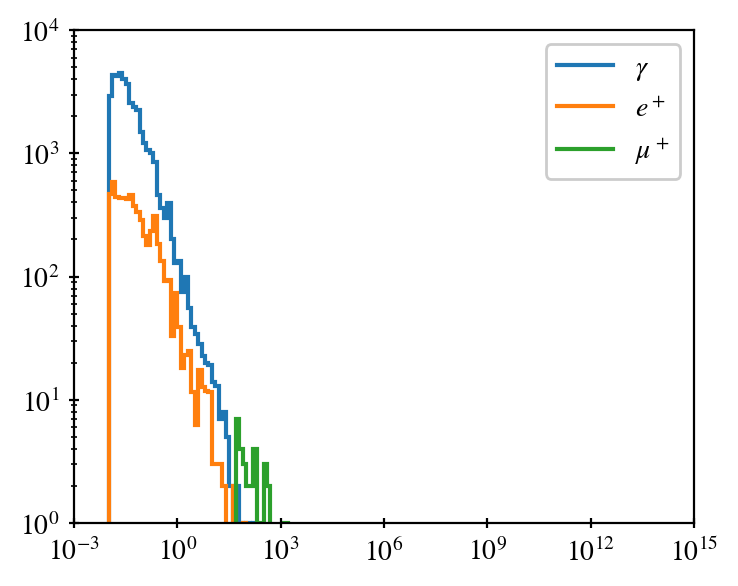

In [95]:
fig, ax = plt.subplots(dpi=200)
ax.set(xscale="log", yscale="log")

mplhep.histplot(hist[bh.loc(22), :, bh.sum, bh.sum], ax=ax, label=r"$\gamma$")
mplhep.histplot(hist[bh.loc(11), :, bh.sum, bh.sum], ax=ax, label=r"$e^+$")
mplhep.histplot(hist[bh.loc(13), :, bh.sum, bh.sum], ax=ax, label=r"$\mu^+$")

ax.legend()